# 1. Empirisches Projekt
---
### **Skript zu Daten Manipulation, Visulallisierung und zur Regressions Analyse**

Dieses Sktipt soll euch helfen eine Datenanalyse sowie eine `Logistische Regression` aufzubauen.

*-> Falls ihr fragen habt bitte sagt mir bescheid ich helfe gerne aus!*

> E-Mail: riccardo.dandrea@live.de
> Ihr könnte gerne eine Mail schreiben wo wir uns Per zoom treffen können, falls ihr schwierigkeiten habt bei der Programmierung:
> BITTE schreibt in der MAIL:
> - Was habt ihr vor ?
> - Wo liegt das Problem mit Code und Fehlermeldung
> - und wann ihr euch Per zoom treffen wollt Tag und Uhrzeit.

Diese Information geben mir Zeit mich vorzubereiten auf das Problem

Für die Datenanalyse kann als unterstützung der Leitfaden "Leitfaden.ipynbn" als unterstützung genutzt werden.
Ab Punkt 2. wird erklärt wie Libaries installiert werden und wie die Daten eingelesen werden können. Sowie weitere Schritte zur Datenanalyse.


**Bedenke das du deine Daten immer hinterfragen solltest!!**

---

Informationen zu den Daten findest du unter folgenden 
Link: https://www.kaggle.com/datasets/shubhamgupta012/titanic-dataset

The dataset includes the following columns:

- PassengerId: Unique identifier for each passenger.
- Survived: Survival status of the passenger (0 = Not Survived, 1 = Survived).
- Pclass: Passenger class (1 = First class, 2 = Second class, 3 = Third class).
- Sex: Gender of the passenger.
- Age: Age of the passenger.
- SibSp: Number of siblings/spouses aboard the Titanic.
- Parch: Number of parents/children aboard the Titanic.
- Fare: Fare paid by the passenger.
- Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

## Daten einladen
---

In [66]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd

In [67]:
# Hier wird der Download für den Datensatz vorbereitet
file_id = '1uujka4TJygnHSrai5rDmao8z9SeP_PsE'
download_link = f"https://drive.google.com/uc?id={file_id}"

In [68]:
# Einen Datensatz mit Pandas laden
df = pd.read_csv(download_link, sep = ",")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
df.shape

(891, 12)

Um Redundante Spalten zu entfern kannst du folgende Funktion nutzen:

In [70]:
#df.drop(columns=["Spalte"], inplace=True) #<- Füge hier deine Spalte ein die du entferenen willst

## Anpassung der Datentypen
---
Bevor Daten richtig Manipuliert werden können ist es von wichtigkeit die Datentypen anzupassen.
Welche Datentypen es gibt kannst du im Detail im Leitfaden nachlesen unter Punkt 1.3.

Folgende Datentypen gibt es:

-> `"string"`

-> `"int"`

-> `"float"`

-> `"bool"`

-> `"category"`

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Entscheide nun im folgenden welcher Datentyp am besten wäre für  deine Daten:**

In [72]:
df['Survived'] = df["Survived"].astype("category")
# df['Age'] = df['Age'].astype("int")
# df['Name'] = df['Name'].astype("Dein_Datentyp")
# df['Sex'] = df['Sex'].astype("Dein_Datentyp")
# df['Ticket'] = df['Ticket'].astype("Dein_Datentyp")
# df['Cabin'] = df['Cabin'].astype("Dein_Datentyp")
# df['Embarked'] = df['Embarked'].astype("Dein_Datentyp")

print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 77.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
df.describe().round(2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,2.31,29.70,0.52,0.38,32.20
std,257.35,0.84,14.53,1.10,0.81,49.69
min,1.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,2.00,20.12,0.00,0.00,7.91
50%,446.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,3.00,38.00,1.00,0.00,31.00
max,891.00,3.00,80.00,8.00,6.00,512.33


**Fehlende Werte:**
Der Umgang mit fehlenden Werten ist ein entscheidender Schritt bei der Datenvorbereitung und sollte für jede Spalte individuell betrachtet werden.

Die zentrale Frage sollte immer lauten: **Kann ich die fehlenden Werte sinnvoll ersetzen?**

Beispiel: Spalte `"Age"` (Alter)
In diesem Fall stellt sich die Frage: Kann man fehlende Werte in der Spalte `"Age"` sinnvoll ersetzen?

- Antwort: NEIN. Das Alter lässt sich nicht einfach durch den Median, den Modus, den Mittelwert oder den vorherigen Wert ersetzen. Ein solches Vorgehen könnte die Daten erheblich verfälschen, was letztlich dazu führen würde, dass das Modell ungenaue Vorhersagen trifft. Diese Art der Datenmanipulation würde dazu führen, dass das Modell auf falschen Annahmen basiert, was gravierende Auswirkungen auf die Regressionsanalyse und die Vorhersagegenauigkeit hätte.

In [74]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Im Folgenden sehen wir das Beispiel an unseren Datensatz und sehen
- Age fehlen 177 Werte
- Cabin fehlend 687 Werte
- Embarked fehlen 2 Werte.

Wie würdet ihr mit den fehlenden Werten umgehen begründet eure Entscheidung?

In [75]:
# Lösche die Zeilen mit NaN values. ACHTUNG hier werden aus deinem Dataframe ALLE Na values entfernt
df = df.dropna(subset=['Age'])
#df = df.dropna()

# Fülle die NaN values mit einem Wert deiner Wahl. ACHTUNG hier werden aus deinem Dataframe ALLE Na values ersetzt mit der eingefügten Zahl

#df = df.fillna() # Ein Zahl, Formel oder auch ein Funktion kann eingeben. Sollte jedoch immer ein Zahl (int oder float) returnen

# Fülle die NaN values mit dem Durchschnittswert der Spalte

#df["wage"]= df["wage"].fillna(df["wage"].mean()) # nur eine Spalte werden die Daten ersetzt
#df = df.fillna(df.mean()) #<- mean(), mode(), median() / Alle Spalten werden ersetzt

In [76]:
df.shape

(714, 12)

In [77]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Datenfilterung
---
Mit der möglichkeit Daten zufiltern kannst du deine Daten so unterteilen. Um Strukturen oder auch Gruppen festzuleggen die du später
genau untersuchen möchtest.

In [78]:
df_filtered_dead = df[(df["Survived"] == 0)] #<- ein Dataframe nur mit verstorben










df_filtered_sur = df[(df["Survived"] == 1)]  #<- ein Dataframe nur mit den Überlebenden
df_filtered_sur.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [79]:
df_filtered_dead

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


<Axes: title={'center': 'Survival Rate'}, ylabel='count'>

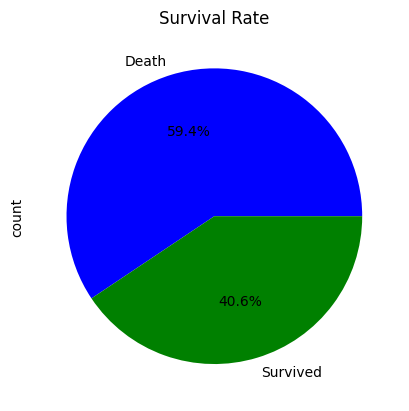

In [80]:
df["Survived"].value_counts().plot(kind="pie", 
                                   autopct='%1.1f%%',           # Prozentangaben in den Segmenten
                                   title="Survival Rate", 
                                   labels=["Death", "Survived"],  
                                   colors=["blue", "green"],    # Farben für die Kategorien festlegen
                                   legend=False)

In [81]:
df_filtered = df[(df["Survived"] == 1) &
                     (df["Pclass"] == 1)]

df_filtered

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


## Visualisation
---
Daten zu Visualisieren geben die neue und detalierte einsichten in deinen Daten daher ist es ratsam sich die Zeit zu nehmen und sich die Daten zu visualisieren

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'How many people have Survived ?')

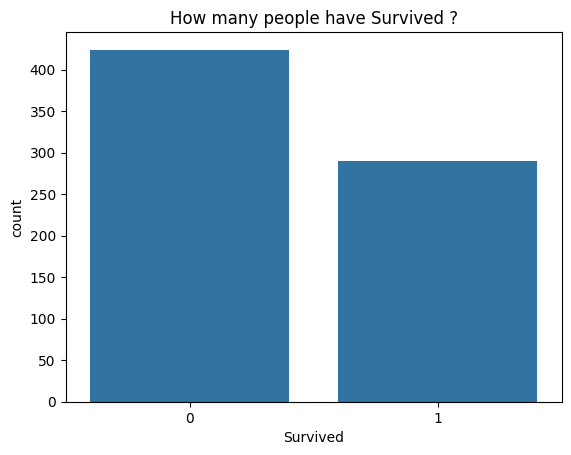

In [83]:
sns.countplot(x='Survived', data=df)
plt.title("How many people have Survived ?")
#plt.xlabel("Survial count plot")
#plt.legend(['First line', 'Second line'],loc="upper left")


<Axes: xlabel='Survived', ylabel='count'>

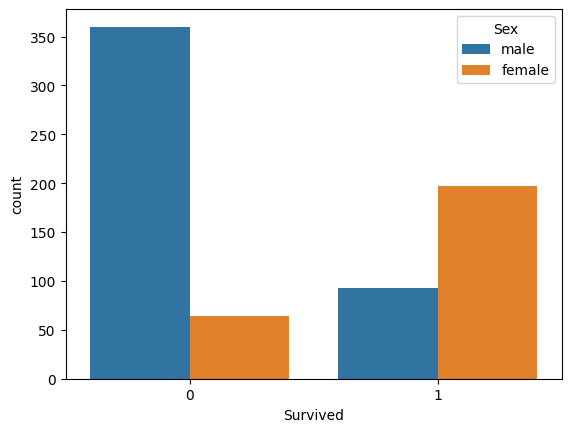

In [84]:
sns.countplot(x='Survived',hue='Sex',data=df)

<Axes: xlabel='Survived', ylabel='count'>

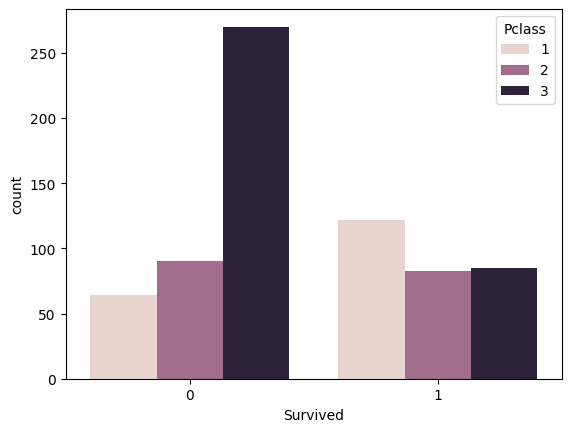

In [85]:
sns.countplot(x='Survived',hue='Pclass',data=df)

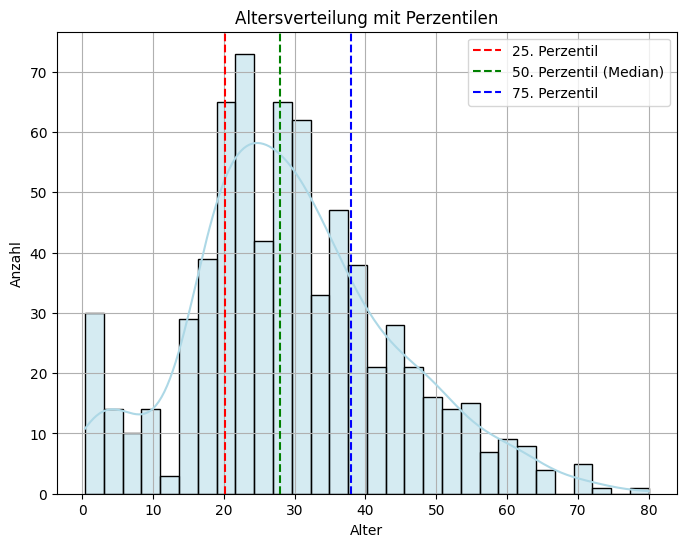

In [86]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Daten ohne NaN-Werte
data_age = df['Age'].dropna()

# Berechne die Perzentile (25., 50., 75.)
q25_age = np.percentile(data_age, 25)
q50_age = np.percentile(data_age, 50)  # Median
q75_age = np.percentile(data_age, 75)

# Erstelle den Plot
plt.figure(figsize=(8, 6))

# Plot der Verteilung
sns.histplot(data_age, kde=True, bins=30, color="lightblue")

# Füge die vertikalen Linien für die Perzentile hinzu
plt.axvline(x=q25_age, color='red', linestyle='--', label='25. Perzentil')
plt.axvline(x=q50_age, color='green', linestyle='--', label='50. Perzentil (Median)')
plt.axvline(x=q75_age, color='blue', linestyle='--', label='75. Perzentil')

# Plot-Details
plt.legend()
plt.grid(True)
plt.title('Altersverteilung mit Perzentilen')
plt.xlabel('Alter')
plt.ylabel('Anzahl')

plt.show()


## Logistische Regression
---

Da eine Logistische Regression ein berechnung mit nummerischen Werte sind müssen wir zu nächst Überlegen welche Spalten ein relevanten beitrag zu unserer Regression beitragen

Folgende Spalten Parch, Embarked, Name, SibSp, PassengerId verfolgen keine musster oder Gruppierung woraus Schlüsse geozgen werden können die ein Wert vollen beitrag zu einer Regression bei tragen kann daher entfernen wie diese.

Für die beschreibung der Spalten schaut gerne nochmal am anfang des Skriptes nach

In [87]:
df = df.drop(columns=["Ticket","Parch","Embarked","Name","SibSp","PassengerId","Cabin","Fare"])
df.head(), df.shape

(  Survived  Pclass     Sex   Age
 0        0       3    male  22.0
 1        1       1  female  38.0
 2        1       3  female  26.0
 3        1       1  female  35.0
 4        0       3    male  35.0,
 (714, 4))

In [88]:
df

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
885,0,3,female,39.0
886,0,2,male,27.0
887,1,1,female,19.0
889,1,1,male,26.0


In [89]:
df['Sex'].replace(['male','female'], [0, 1], inplace=True)

In [90]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
dtype: int64

In [91]:
y = df['Survived']
X = df.drop(columns=["Survived"])

### Erstellung der Regression

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

In [93]:
model = LogisticRegression()
print(model.fit(X, y))
model.score(X, y)

LogisticRegression()


0.7899159663865546

In [94]:
print("Koeffizienten:",model.coef_)
print("Intercept: ", model.intercept_)
dataframe = pd.DataFrame(model.coef_, columns=X.columns)
dataframe["Intercept"] = model.intercept_
dataframe

Koeffizienten: [[-1.24920662  2.41244466 -0.03613813]]
Intercept:  [2.46982661]


,Pclass,Sex,Age,Intercept
0,-1.249207,2.412445,-0.036138,2.469827


In [95]:
cross_val_score(model, X, y, cv=5).mean()

np.float64(0.7857382054565154)

In [96]:
y_predicted = model.predict(X)
confusion_matrix(y, y_predicted)

array([[357,  67],
       [ 83, 207]])

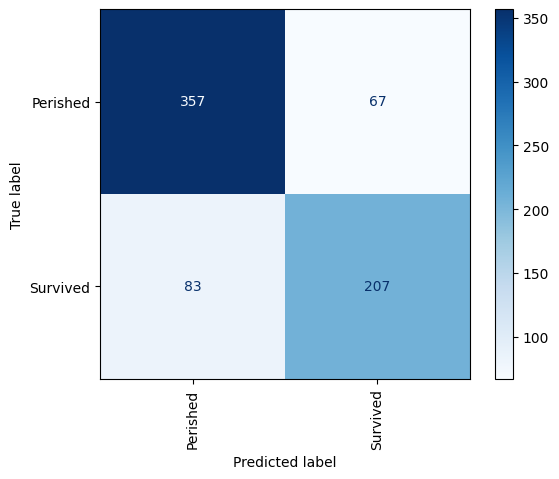

In [97]:
# Erstelle und zeige die Verwirrungsmatrix
ConfusionMatrixDisplay.from_estimator(model, X, y, display_labels=['Perished', 'Survived'], cmap='Blues')

# Plot anzeigen
plt.xticks(rotation='vertical')
plt.show()

In [98]:
print(classification_report(y, y_predicted))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       424
           1       0.76      0.71      0.73       290

    accuracy                           0.79       714
   macro avg       0.78      0.78      0.78       714
weighted avg       0.79      0.79      0.79       714



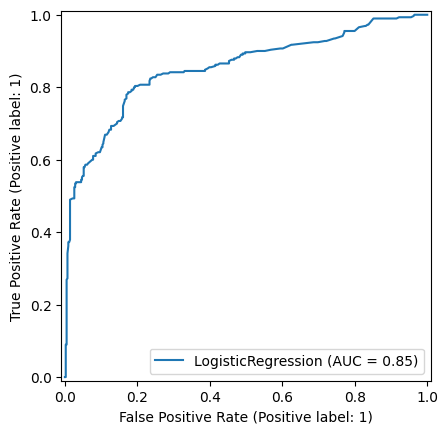

In [99]:
# Berechne und zeige die ROC-Kurve
RocCurveDisplay.from_estimator(model, X, y)

# Plot anzeigen
plt.show()


Erstellung eine Vohersage: 

Person 1:

- ***22 Jahre alt, männlich, 3. Klasse***


In [100]:
Male = [[3,1,22]]
print(model.predict(Male)[0])
probability = model.predict_proba(Male)[0][1]
print(f'Überlebens wahrscheinlichkeit: {probability:.1%}')

1
Überlebens wahrscheinlichkeit: 58.4%


Erstellung eine Vohersage: 

Person 2:

- ***44 Jahre alt, Weiblich, 1. Klasse***


In [101]:
Female = [[1,1,44]]
probability = model.predict_proba(Female)[0][1]
print(f'Probability of survival: {probability:.1%}')

Probability of survival: 88.5%


Erstellung eine Vohersage: 

Person 3:

- ***66 Jahre alt, männlich, 1. Klasse***


In [102]:
Female = [[1,0,66]]
probability = model.predict_proba(Female)[0][1]
print(f'Probability of survival: {probability:.1%}')

Probability of survival: 23.8%


---

### Logit:

In [103]:
import statsmodels.api as sm

# Schritt 1: Konstante (Intercept) hinzufügen
X_const = sm.add_constant(X)

# Schritt 2: Logit-Modell erstellen
logit_model = sm.Logit(y, X_const)

# Schritt 3: Modell anpassen
results = logit_model.fit()
results.summary()
# Schritt 4: Vorhersagen treffen
predictions_Logit = results.predict(X_const)

# Vorhersagen anzeigen
print(results.summary())


Optimization terminated successfully.
         Current function value: 0.453285
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      710
Method:                           MLE   Df Model:                            3
Date:                Tue, 01 Oct 2024   Pseudo R-squ.:                  0.3289
Time:                        11:42:38   Log-Likelihood:                -323.65
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 1.860e-68
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5339      0.456      5.554      0.000       1.640       3.428
Pclass        -1.2885      0.

In [104]:
from sklearn.metrics import confusion_matrix

# Wahrscheinlichkeiten aus dem Modell
predictions_Logit = results.predict(X_const)

# Wahrscheinlichkeiten in binäre Vorhersagen umwandeln (Schwellenwert = 0.5)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions_Logit]

# Konfusionsmatrix berechnen
cm = confusion_matrix(y, binary_predictions)

# Ausgabe der Konfusionsmatrix
print(cm)


[[356  68]
 [ 83 207]]


In [105]:
print(classification_report(y, y_predicted))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       424
           1       0.76      0.71      0.73       290

    accuracy                           0.79       714
   macro avg       0.78      0.78      0.78       714
weighted avg       0.79      0.79      0.79       714



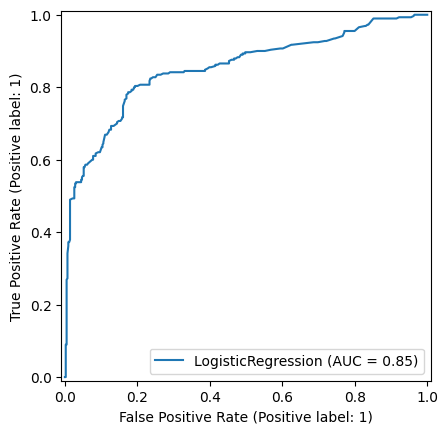

In [106]:
# Berechne und zeige die ROC-Kurve
RocCurveDisplay.from_estimator(model, X, y)

# Plot anzeigen
plt.show()


---
## Probit


In [107]:
X_const

,const,Pclass,Sex,Age
0,1.0,3,0,22.0
1,1.0,1,1,38.0
2,1.0,3,1,26.0
3,1.0,1,1,35.0
4,1.0,3,0,35.0
...,...,...,...,...
885,1.0,3,1,39.0
886,1.0,2,0,27.0
887,1.0,1,1,19.0
889,1.0,1,0,26.0


In [108]:
# Konstante hinzufügen
X_const = sm.add_constant(X)

# Probit-Modell erstellen und anpassen
Probit_model = sm.Probit(y, X_const)
results = Probit_model.fit()

# Zusammenfassung des Modells
print(results.summary())


Optimization terminated successfully.
         Current function value: 0.455180
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  714
Model:                         Probit   Df Residuals:                      710
Method:                           MLE   Df Model:                            3
Date:                Tue, 01 Oct 2024   Pseudo R-squ.:                  0.3261
Time:                        11:42:38   Log-Likelihood:                -325.00
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 7.167e-68
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3855      0.259      5.346      0.000       0.878       1.893
Pclass        -0.7206      0.

In [111]:
import pandas as pd
from scipy.stats import chi2_contingency

# Schritt 1: Erstelle eine Kreuztabelle
# Annahme: df ist dein DataFrame mit den Variablen 'Survived' und 'Pclass'
contingency_table = pd.crosstab(df['Survived'], df['Age'])

# Schritt 2: Chi²-Test durchführen
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Ergebnisse anzeigen
print(f"Chi²-Wert: {chi2}")
print(f"p-Wert: {p}")
print(f"Freiheitsgrade: {dof}")
print("Erwartete Häufigkeiten:")
print(expected)

# Beurteilung des Ergebnisses
if p < 0.05:
    print("Das Ergebnis ist statistisch signifikant. Es gibt einen Zusammenhang zwischen den Variablen.")
else:
    print("Das Ergebnis ist nicht statistisch signifikant. Es gibt keinen Zusammenhang zwischen den Variablen.")

Chi²-Wert: 104.15604988902831
p-Wert: 0.10141111018860959
Freiheitsgrade: 87
Erwartete Häufigkeiten:
[[ 0.59383754  0.59383754  1.18767507  1.18767507  0.59383754  4.15686275
   5.93837535  3.56302521  5.93837535  2.37535014  1.78151261  1.78151261
   2.37535014  4.75070028  1.18767507  2.37535014  0.59383754  1.18767507
   3.56302521  0.59383754  2.96918768 10.0952381   7.71988796 15.43977591
  14.84593838  8.90756303  0.59383754 14.25210084 16.03361345  8.90756303
   0.59383754 17.81512605  0.59383754 13.65826331 10.68907563 10.68907563
  14.84593838  1.18767507 11.8767507  14.84593838  1.18767507 10.0952381
  10.68907563  1.18767507  8.90756303  8.90756303  0.59383754 10.68907563
  13.06442577  0.59383754  3.56302521  6.53221289  8.31372549  7.71988796
   1.18767507  3.56302521  7.71988796  2.96918768  5.34453782  7.12605042
   1.18767507  1.78151261  5.34453782  5.34453782  3.56302521  5.93837535
   4.15686275  3.56302521  0.59383754  4.75070028  1.18767507  0.59383754
   2.3753501